The Polar Rotation Angle (PRA) is computed from the right and left singular vectors of $ \xi_i, \eta_i $ (with i = 1, 2) of the gradient of the flow map $ \mathbf{\nabla F}_{t_0}^{t_N}(\mathbf{x}_0) $:

\begin{equation}
\mathrm{PRA}_{t_0}^{t_N}(\mathbf{x}_0) = \langle \xi_1, \eta_1 \rangle = \langle \xi_2, \eta_2 \rangle \tag{1}
\end{equation}

The singular vectors are related through:
    
\begin{equation}
    \sqrt{\lambda_i(\mathbf{x}_0)}\mathbf{\eta}_i(\mathbf{x}_0) = \mathbf{\nabla F}_{t_0}^t(\mathbf{x}_0) \mathbf{\xi}_i(\mathbf{x}_0), \tag{2}
\end{equation}

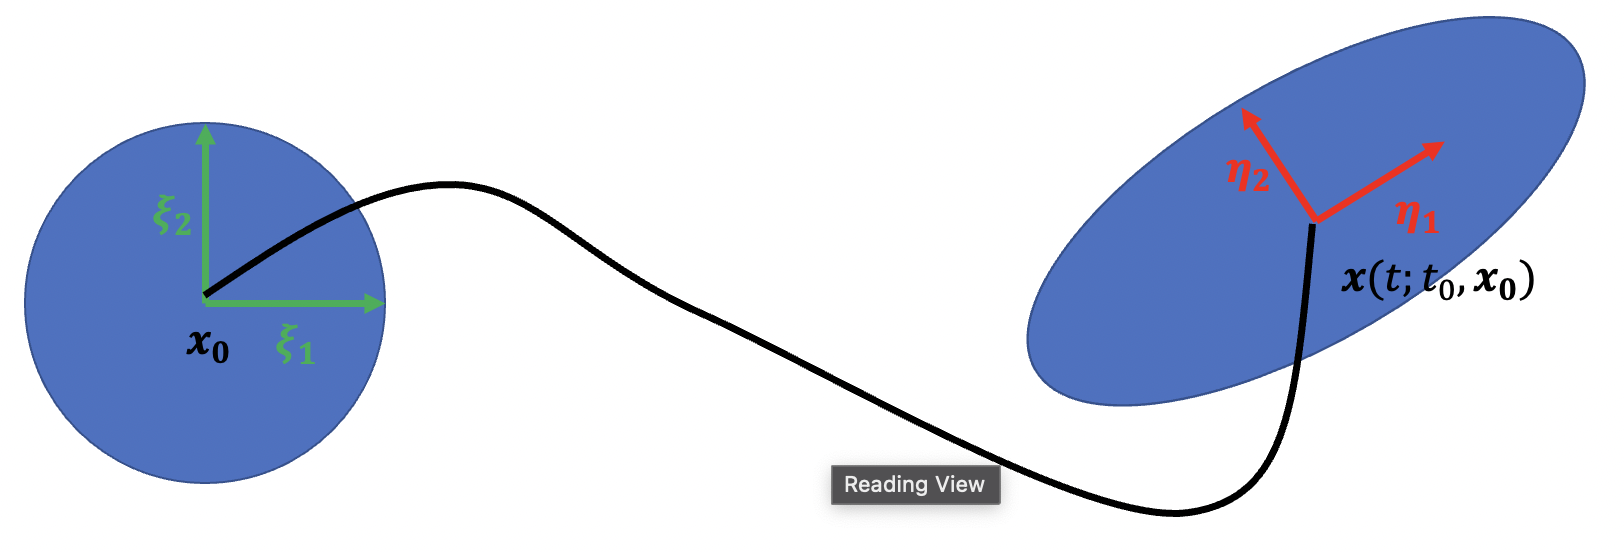

where $ \sqrt{\lambda_i(\mathbf{x}_0)} $ is the i-th singular value of the tensor $ \mathbf{\nabla F}_{t_0}^t(\mathbf{x}_0) $.

As the maximum singular value is less sensitive with respect to numerical errors, it is recommended to use the dominant singular vectors $ \xi_2, \eta_2 $ in order to compute $ \mathrm{PRA}_{t_0}^{t_N}(\mathbf{x}_0) $.

| Name | Type (Shape) | Description |
| --- | --- | --- |
| grad_Fmap | array (2, 2) | $ \mathbf{\nabla F}_{t_0}^{t_N}(\mathbf{x}_0) $|
| PRA | float | $ \mathrm{PRA}_{t_0}^{t_N}(\mathbf{x}_0) $|

In [ ]:
# Import numpy
import numpy as np

# Import arccos from math
from math import acos

# Import function to compute singular values/vectors of two-dimensional matrix
from ipynb.fs.defs.SVD import SVD

In [ ]:
def _PRA(grad_Fmap):
    '''
    Computes PRA from the gradient of the flow map
    
    Parameters:
        grad_Fmap: array (2, 2), gradient of flow map
    
    Returns:
        PRA: float, Polar Rotation Angle (PRA)
    '''
                
    P, SIG, Q = SVD(grad_Fmap)
    
    # P is a (2,2) array storing the left singular vectors
    # Q is a (2,2) array storing the right singular vectors
    
    argcos = P[0, 0]*Q[0, 0]+P[1, 0]*Q[1, 0]
            
    if abs(argcos) > 1:
                
        PRA = 0
                
    else:
            
        PRA = acos(argcos)
        
    return PRA